# Import Libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Usefull Functions

## Qualitative and Quantitative Discrete Frequency Distribution

In [101]:
def quali_quanti_discrete_frequency_distribution (column:pd.Series):

    frequency_distribution = pd.crosstab(
        column, "frequecy",
        dropna=False
    )
    
    frequency_distribution["proportion"] = pd.crosstab(
        column, 
        "proportion"
    )/len(column)
    
    frequency_distribution["percentage"] = 100*pd.crosstab(
        column, 
        "percentage"
    )/len(column)
    
    return frequency_distribution.reset_index()

## Quantitative Continuous Frequency Distribution

In [102]:
def quanti_continuous_frequency_distribution(column:pd.Series, bins:range):

    column_range = pd.DataFrame()
    
    column_range["range"] = pd.cut(column, bins=bins, right=False)
    
    frequency_distribution = pd.crosstab(
        column_range["range"], 
        "frequecy",
        dropna=False
    )
    
    frequency_distribution["proportion"] = pd.crosstab(
       column_range["range"], 
       "proportion"
    )/len(column_range)
    
    frequency_distribution["percentage"] = 100*pd.crosstab(
        column_range["range"], 
        "percentage"
    )/len(column_range)

    frequency_distribution = frequency_distribution.reset_index()

    frequency_distribution["bin_centres"] = frequency_distribution["range"].apply(lambda x: x.mid)

    frequency_distribution = frequency_distribution.iloc[:, [0, 4, 1, 2, 3]]
    
    return frequency_distribution

# Load the data

## MB Employees Budget Session

In [103]:
mb_employees_budget_session_raw = pd.read_excel("../Dados_EB.xls", sheet_name="Tabela 2.1", header=1)

mb_employees_budget_session_raw = mb_employees_budget_session_raw.drop(columns="N", axis=1)

mb_employees_budget_session_raw.head()

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
0,solteiro,ensino fundamental,NaN,4.00,26,3,interior
1,casado,ensino fundamental,1.0,4.56,32,10,capital
2,casado,ensino fundamental,2.0,5.25,36,5,capital
3,solteiro,ensino médio,NaN,5.73,20,10,outra
4,solteiro,ensino fundamental,NaN,6.26,40,7,outra


In [104]:
mb_employees_budget_session = mb_employees_budget_session_raw.rename(
    columns={
        "Estado Civil": "marital_status",
        "Grau de Instrução": "educational_level",
        "N de Filhos": "childrens",
        "Salario (x Sal Min)": "salary",
        "Anos": "years",
        "Meses": "months",
        "Região de Procedência": "region",
    }
)

mb_employees_budget_session.head()

,marital_status,educational_level,childrens,salary,years,months,region
0,solteiro,ensino fundamental,NaN,4.00,26,3,interior
1,casado,ensino fundamental,1.0,4.56,32,10,capital
2,casado,ensino fundamental,2.0,5.25,36,5,capital
3,solteiro,ensino médio,NaN,5.73,20,10,outra
4,solteiro,ensino fundamental,NaN,6.26,40,7,outra


# Types of Variables

## Qualitative vs Quantitative

Qualitative: possible values ​​are sample qualities

- Nominal: there is no ordering of possible values
- Ordinal: there is ordering of possible values

Quantitative: numbers resulting from measurements or counting

- Discrete: finite or enumerable set of numbers
- Continuous: values ​​belong to a range of real numbers and result from a measurement

Dichotomous Variable: only allows 2 values ​​to occur, success or failure

In [105]:
qualitative_nominal_columns = ["marital_status", "region"]

qualitative_ordinal_columns = ["educational_level"]

quantitative_discrete_columns = ["childrens", "years", "months"]

quantitative_continuouse_columns = ["salary"]

## Scale

Nominal: 

- it can only be said that one measure is or is not different from another;
- mathematical operations cannot be applied to them;
- mode.

Ordinal: 

- it can be said that one measurement is different and greater than the other, but not the quantity that is greater;
- mathematical operations that preserve the structure and do not change the order can be applied;
- mode and median.

Interval: 

- it can be said that a measure is different, greater, and the quantity that is greater;
- requires an arbitrary origin and a unit of measurement;
- mathematical operations that preserve the structure, T = ax + b, a > 0;
- mode, median, and average.

Ratio: 

- it can be said that a measure is different, greater, quantity that is greater, and how many times it is greater;
- there is an absolute zero;
- mathematical operations that preserve the structure, T = cx, c > 0;
- mode, median, and average.

# Frequency Distribution

## Qualitative and Quantitative Discrete

In [106]:
quali_quanti_discrete_frequency_distribution(mb_employees_budget_session["educational_level"])

col_0,educational_level,frequecy,proportion,percentage
0,ensino fundamental,12,0.333333,33.333333
1,ensino médio,18,0.500000,50.000000
2,superior,6,0.166667,16.666667


## Quantitative Continuous

In [107]:
salary_frequency = quanti_continuous_frequency_distribution(mb_employees_budget_session['salary'], range(4, 25, 4))

salary_frequency

col_0,range,bin_centres,frequecy,proportion,percentage
0,"[4, 8)",6.0,10,0.277778,27.777778
1,"[8, 12)",10.0,12,0.333333,33.333333
2,"[12, 16)",14.0,8,0.222222,22.222222
3,"[16, 20)",18.0,5,0.138889,13.888889
4,"[20, 24)",22.0,1,0.027778,2.777778


## Exercises

#### 1. find the frequency distribution of the variables:

- "Estado Civil"
- "Região de Procedência"
- "N de Filhos"
- "Anos"

##### Estado Civil

In [108]:
quali_quanti_discrete_frequency_distribution(mb_employees_budget_session["marital_status"])

col_0,marital_status,frequecy,proportion,percentage
0,casado,20,0.555556,55.555556
1,solteiro,16,0.444444,44.444444


##### Região de Procedência

In [109]:
quali_quanti_discrete_frequency_distribution(mb_employees_budget_session["region"])

col_0,region,frequecy,proportion,percentage
0,capital,11,0.305556,30.555556
1,interior,12,0.333333,33.333333
2,outra,13,0.361111,36.111111


##### N de Filhos

In [110]:
quali_quanti_discrete_frequency_distribution(mb_employees_budget_session["childrens"])

col_0,childrens,frequecy,proportion,percentage
0,0.0,4,0.111111,11.111111
1,1.0,5,0.138889,13.888889
2,2.0,7,0.194444,19.444444
3,3.0,3,0.083333,8.333333
4,5.0,1,0.027778,2.777778
5,NaN,16,NaN,NaN


##### Anos

In [111]:
quali_quanti_discrete_frequency_distribution(mb_employees_budget_session["years"])

col_0,years,frequecy,proportion,percentage
0,20,1,0.027778,2.777778
1,23,1,0.027778,2.777778
2,25,1,0.027778,2.777778
3,26,2,0.055556,5.555556
4,27,1,0.027778,2.777778
5,28,1,0.027778,2.777778
6,29,1,0.027778,2.777778
7,30,2,0.055556,5.555556
8,31,2,0.055556,5.555556
9,32,2,0.055556,5.555556


In [112]:
quanti_continuous_frequency_distribution(mb_employees_budget_session["years"], range(20, 51, 6))

col_0,range,bin_centres,frequecy,proportion,percentage
0,"[20, 26)",23.0,3,0.083333,8.333333
1,"[26, 32)",29.0,9,0.250000,25.000000
2,"[32, 38)",35.0,12,0.333333,33.333333
3,"[38, 44)",41.0,9,0.250000,25.000000
4,"[44, 50)",47.0,3,0.083333,8.333333


#### 2. find the frequency distribution of the variables of the sheet "CD-Brasil":

- "População"
- "Densidade"

In [113]:
cd_brasil_raw = pd.read_excel("../Dados_EB.xls", sheet_name="CD-Brasil", header=4)

cd_brasil_raw.head()

,Unnamed: 0,Unnamed: 1,Superfície,População,Densidade
0,Norte,RO,237576.167,1453756,6.119115
1,Norte,AC,164165.250,653385,3.980044
2,Norte,AM,1559161.810,3221940,2.066456
3,Norte,RR,224298.980,395725,1.764275
4,Norte,PA,1247689.515,7065573,5.662926


In [114]:
cd_brasil = cd_brasil_raw.rename(
    columns={
        "Unnamed: 0": "region",
        "Unnamed: 1": "state",
        "Superfície": "surface",
        "População": "population",
        "Densidade": "density"
    }
)

cd_brasil.head()

,region,state,surface,population,density
0,Norte,RO,237576.167,1453756,6.119115
1,Norte,AC,164165.250,653385,3.980044
2,Norte,AM,1559161.810,3221940,2.066456
3,Norte,RR,224298.980,395725,1.764275
4,Norte,PA,1247689.515,7065573,5.662926


In [115]:
quali_quanti_discrete_frequency_distribution(cd_brasil["region"])

col_0,region,frequecy,proportion,percentage
0,Brasil,1,0.030303,3.030303
1,Centro-Oeste,5,0.151515,15.151515
2,Nordeste,10,0.303030,30.303030
3,Norte,8,0.242424,24.242424
4,Sudeste,5,0.151515,15.151515
5,Sul,4,0.121212,12.121212


##### População

In [116]:
quanti_continuous_frequency_distribution(cd_brasil["population"], np.logspace(start=5.5, stop=8.5, base=10, num=10))

col_0,range,bin_centres,frequecy,proportion,percentage
0,"[316227.766, 681292.069)",4.987599e+05,3,0.090909,9.090909
1,"[681292.069, 1467799.268)",1.074546e+06,2,0.060606,6.060606
2,"[1467799.268, 3162277.66)",2.315038e+06,7,0.212121,21.212121
3,"[3162277.66, 6812920.691)",4.987599e+06,6,0.181818,18.181818
4,"[6812920.691, 14677992.676)",1.074546e+07,8,0.242424,24.242424
5,"[14677992.676, 31622776.602)",2.315038e+07,3,0.090909,9.090909
6,"[31622776.602, 68129206.906)",4.987599e+07,2,0.060606,6.060606
7,"[68129206.906, 146779926.762)",1.074546e+08,1,0.030303,3.030303
8,"[146779926.762, 316227766.017)",2.315038e+08,1,0.030303,3.030303


##### Densidade

In [117]:
quanti_continuous_frequency_distribution(cd_brasil["density"], np.logspace(start=0.1, stop=2.8, base=10, num=10))

col_0,range,bin_centres,frequecy,proportion,percentage
0,"[1.259, 2.512)",1.8855,2,0.060606,6.060606
1,"[2.512, 5.012)",3.7620,5,0.151515,15.151515
2,"[5.012, 10.0)",7.5060,4,0.121212,12.121212
3,"[10.0, 19.953)",14.9765,3,0.090909,9.090909
4,"[19.953, 39.811)",29.8820,5,0.151515,15.151515
5,"[39.811, 79.433)",59.6220,7,0.212121,21.212121
6,"[79.433, 158.489)",118.9610,4,0.121212,12.121212
7,"[158.489, 316.228)",237.3585,1,0.030303,3.030303
8,"[316.228, 630.957)",473.5925,2,0.060606,6.060606


# Graphical Representation

## Qualitative Variables

### Bar Chart

<BarContainer object of 3 artists>

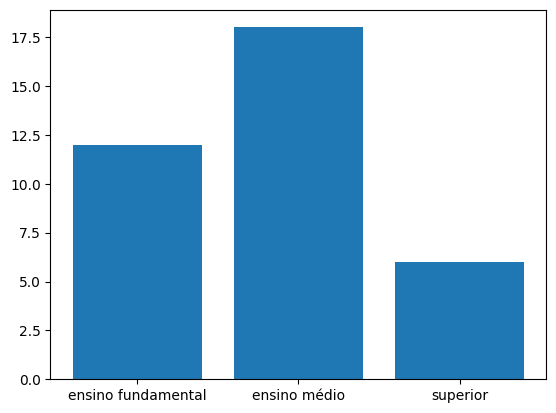

In [118]:
value_count_grau_instrucao = mb_employees_budget_session["educational_level"].value_counts().sort_index()

plt.bar(x=value_count_grau_instrucao.index, height=value_count_grau_instrucao)

<Axes: xlabel='educational_level', ylabel='count'>

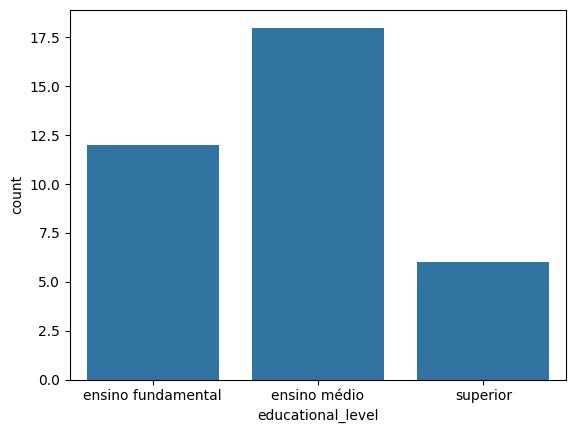

In [119]:
sns.countplot(mb_employees_budget_session, x="educational_level")

### Pie Chart

([<matplotlib.patches.Wedge at 0x12bda3c50>,
 [Text(0.5499999722395388, 0.9526279601903919, 'ensino fundamental'),
  Text(-0.9526276913711704, -0.5500004378478569, 'ensino médio'),
  Text(0.9526280978792577, -0.5499997337553423, 'superior')])

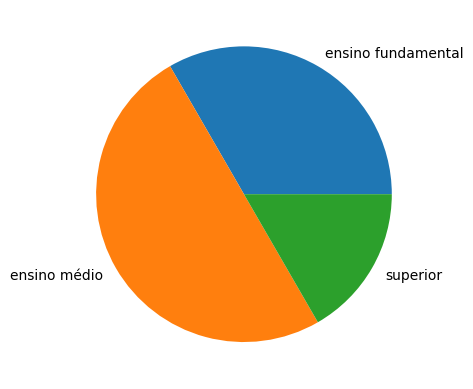

In [120]:
plt.pie(value_count_grau_instrucao, labels=value_count_grau_instrucao.index)

## Quantitative Representation

### Discrete

#### Bar Chart

<Axes: xlabel='childrens', ylabel='count'>

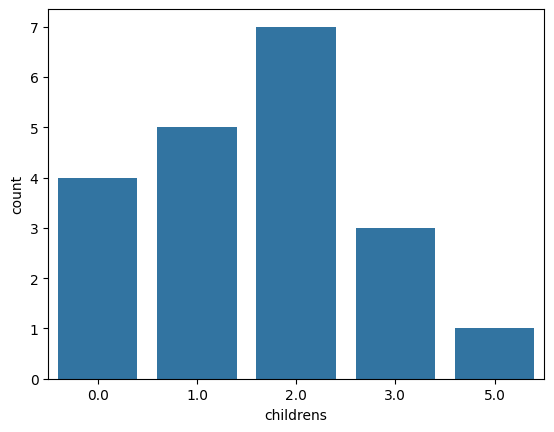

In [121]:
sns.countplot(mb_employees_budget_session, x="childrens")

### Continuous

#### Bar Chart

In [122]:
salary_frequency

col_0,range,bin_centres,frequecy,proportion,percentage
0,"[4, 8)",6.0,10,0.277778,27.777778
1,"[8, 12)",10.0,12,0.333333,33.333333
2,"[12, 16)",14.0,8,0.222222,22.222222
3,"[16, 20)",18.0,5,0.138889,13.888889
4,"[20, 24)",22.0,1,0.027778,2.777778


<BarContainer object of 5 artists>

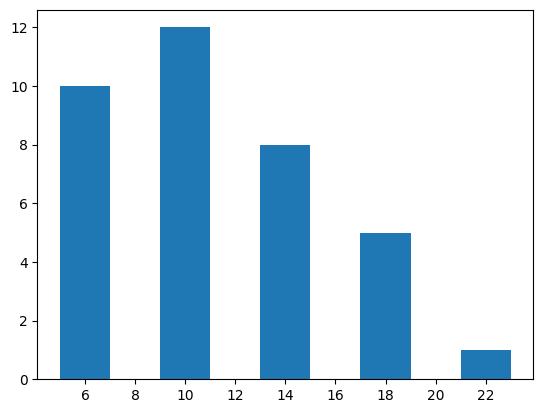

In [123]:
plt.xticks(list(range(int(min(salary_frequency.bin_centres)-2), int(max(salary_frequency.bin_centres)+2), 2)))

plt.bar(x=salary_frequency.bin_centres, height=salary_frequency.frequecy, width=2)

<Axes: xlabel='bin_centres', ylabel='frequecy'>

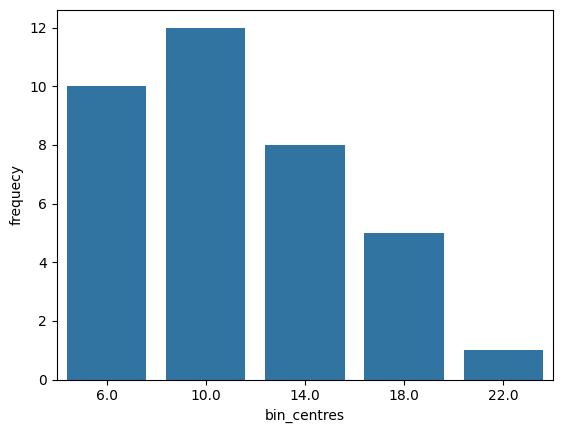

In [124]:
sns.barplot(salary_frequency, x="bin_centres", y="frequecy")

#### Histogram

<Axes: >

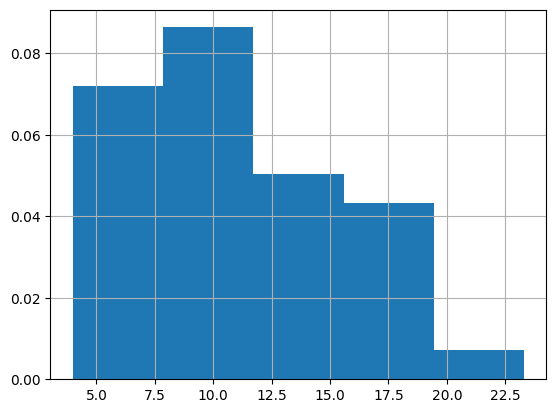

In [125]:
mb_employees_budget_session.salary.hist(bins=5, density=True)

### Exercises

#### 5. Using de data from the Exercise 2:

- Build a histogram of the variable "years"
- Propose a graphical representation for the variable "educational_level"

<Axes: >

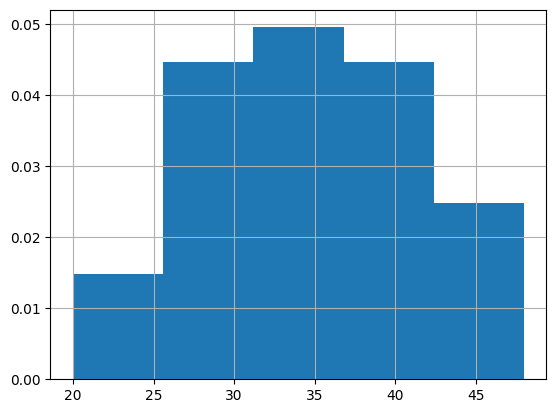

In [126]:
mb_employees_budget_session.years.hist(bins=5, density=True)

<Axes: xlabel='educational_level', ylabel='count'>

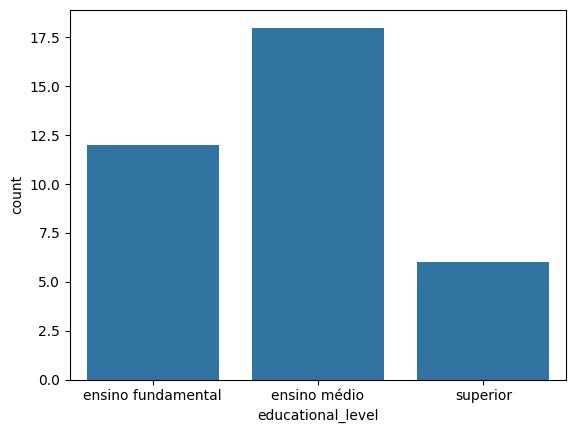

In [127]:
sns.countplot(mb_employees_budget_session, x="educational_level")

#### 8. Build an histogram for the dataset "CD-Municipios":

In [128]:
cd_municipios_raw = pd.read_excel("../Dados_EB.xls", sheet_name="CD-Municipios", header=4)

cd_municipios_raw.head()

,N,Município,População
0,1,São Paulo(SP),988.8
1,2,Rio de Janeiro(RJ),556.9
2,3,Salvador(BA),224.6
3,4,Belo Horizonte(MG),210.9
4,5,Fortaleza(CE),201.5


In [129]:
cd_municipios = cd_municipios_raw.rename(
    columns={
        "Município": "city",
        "População": "population"
    }
)

cd_municipios = cd_municipios.drop(index=30, axis=0)

cd_municipios.head()

,N,city,population
0,1,São Paulo(SP),988.8
1,2,Rio de Janeiro(RJ),556.9
2,3,Salvador(BA),224.6
3,4,Belo Horizonte(MG),210.9
4,5,Fortaleza(CE),201.5


<Axes: >

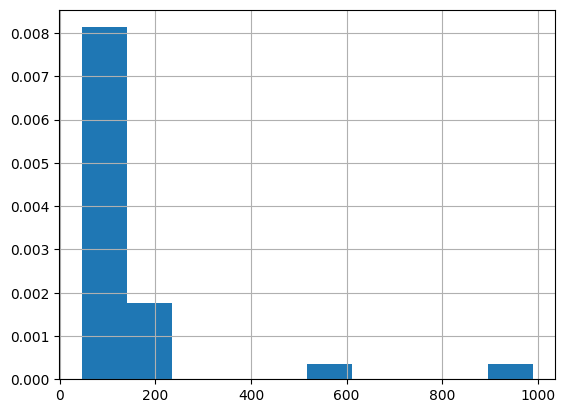

In [130]:
cd_municipios.population.hist(bins=10, density=True)